# **CS 5361/6361 Machine Learning - Visualizing a Simple ML Task**

<h1 style="font-size:10em">Predicting who will pass this class</h1>

**Author:** Olac Fuentes<br>
Computer Science Department<br>
University of Texas at El Paso<br>
**Last modified:** 8/28/2024<br>

A professor wants to know who among his students are likely to pass the class from their performance in the first part of the semester.

The professor has data indicating, for every student in the previous semester, the student's grades on the first two exams and the final course grade.

The professor wants to:

1. Build a model to predict, as accurately as possible, the final grade of every student in the current semester given his/her results on the first two exams, taking advantage of the data from the previous semester.
2. Estimate how accurate the model's predictions will be.

In this notebook we will show how we can help the professor solve the problem.



First, we will import the necessary libraries.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Since we don't have permission to use real student data, we will create a random dataset using a function from the sklearn library. The documentation of the function to generate the data can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


In [3]:
# Create artificial dataset with two features
X, y = make_blobs(n_samples = [20,40,40,100],random_state=2, centers = [[35,30],[40,60],[70,40],[65,80]],cluster_std = [10,10,10,15])
y = np.int16(y==3)
print(f'{X.shape =}, {y.shape=}')

X.shape =(200, 2), y.shape=(200,)


Here, $X$ is a 200-by-2 array, representing 200 instances, each with two features (the results for exams 1 and 2), and $y$ is a 1-D array of length 200 containing the class of the instances in the dataset. Thus, for $0\leq i <200$,
$X[i,0]$ is the grade student $i$ obtained in exam 1, $X[i,1]$ is the grade for exam 2 and
$y[i]$ is student $i$'s final result, $y[i]=1$ means the student passed the course and  $y[i]=0$ means he/she did not.


We will now display the instances in the dataset. The $i$th instance is represented by a point with coordinates $\langle X[i,0], X[i,1] \rangle$ and its color is defined by its class, red for class 0, green for class 1, and blue for class 2.


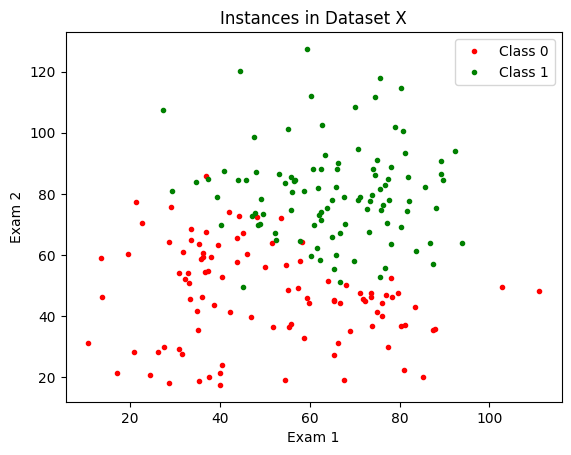

In [4]:
colors = 'rg'
classes = sorted(set(y))
plt.figure()
for c in classes:
  ind = (y==c)
  plt.plot(X[ind,0],X[ind,1],'.'+colors[c],label = 'Class '+str(c))
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend()
plt.title('Instances in Dataset X')
plt.show()

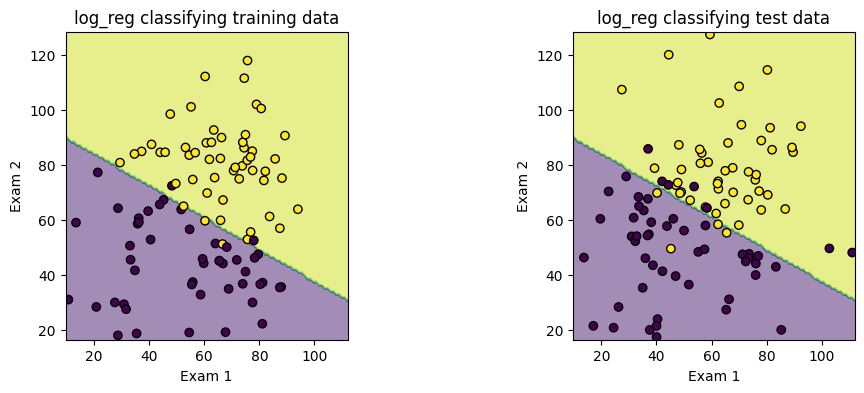

Prediction accuracy on training set: 0.9500
Prediction accuracy on test set:     0.8900


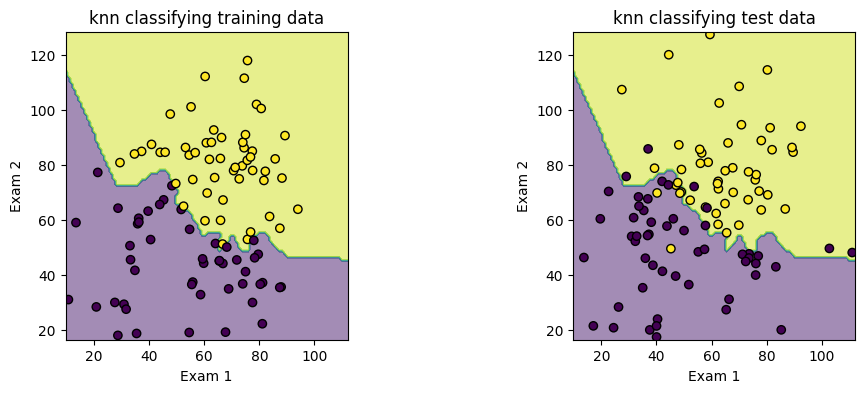

Prediction accuracy on training set: 1.0000
Prediction accuracy on test set:     0.8600


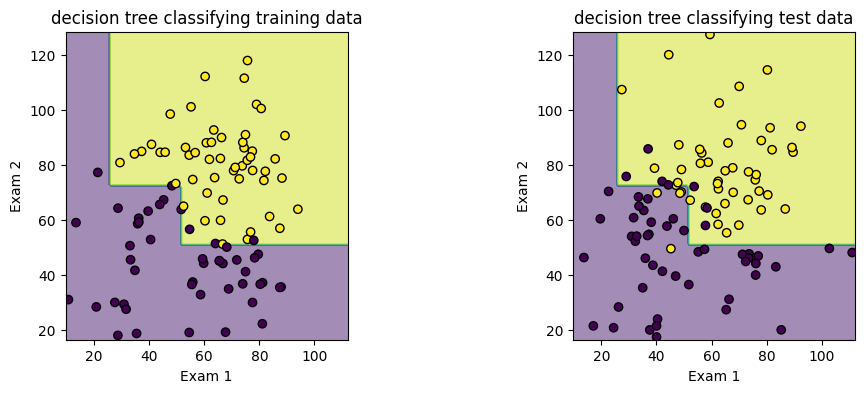

Prediction accuracy on training set: 0.9700
Prediction accuracy on test set:     0.8900


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
classifiers = {'log_reg' : LogisticRegression(),
               'knn': KNeighborsClassifier(n_neighbors=1,weights='distance'),
               'decision tree': DecisionTreeClassifier(max_depth=3)}

for c in classifiers:
    classifier = classifiers[c]
    classifier.fit(X_train, y_train)

    fig, ax = plt.subplots(1,2,figsize=(12, 4))

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
    ax[0].set_title(c+' classifying training data')
    ax[0].set_aspect('equal')

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
    disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
    ax[1].set_title(c+' classifying test data')
    ax[1].set_aspect('equal')
    plt.show()

    pred = classifier.predict(X_train)
    print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
    pred = classifier.predict(X_test)
    print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')

What can you say about the decision boundaries found by each of the algorithms? Which of the algorithms would you recommend for this application?

Now let's run the process again with different random seeds.

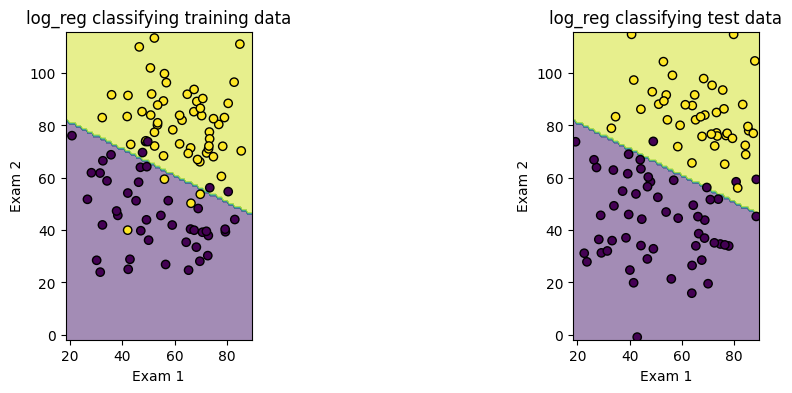

Prediction accuracy on training set: 0.9200
Prediction accuracy on test set:     0.9600


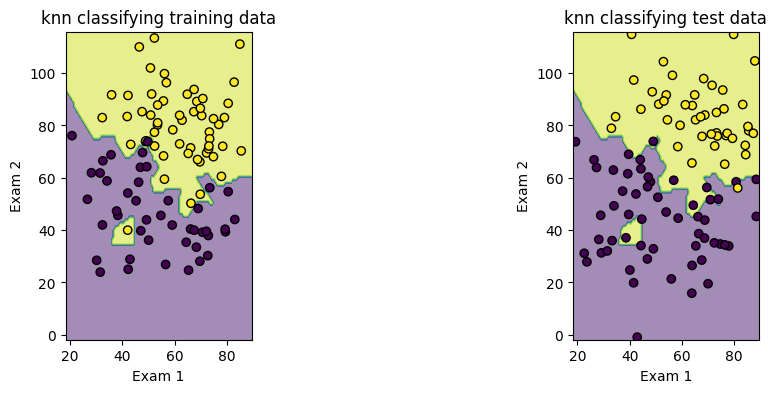

Prediction accuracy on training set: 1.0000
Prediction accuracy on test set:     0.9200


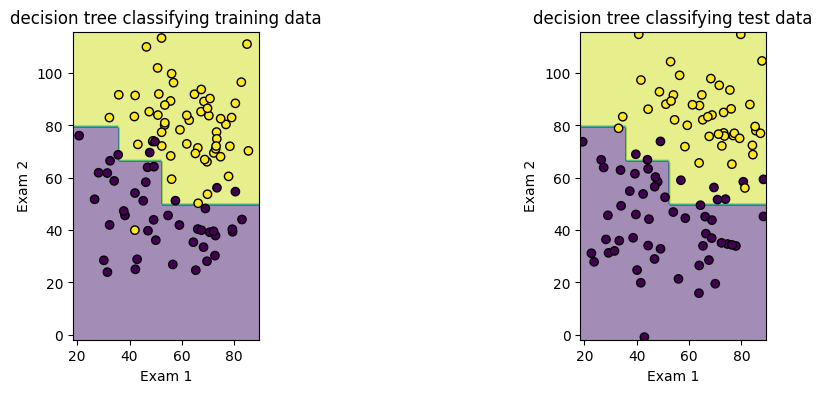

Prediction accuracy on training set: 0.9400
Prediction accuracy on test set:     0.8900


In [6]:
# Create artificial dataset with two features
X, y = make_blobs(n_samples = [20,40,40,100],centers = [[35,30],[40,60],[70,40],[65,80]],cluster_std = [10,10,10,15])
y = np.int16(y==3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
classifiers = {'log_reg' : LogisticRegression(),'knn': KNeighborsClassifier(n_neighbors=1,weights='distance'), 'decision tree': DecisionTreeClassifier(max_depth=3)}

for c in classifiers:
    classifier = classifiers[c]
    classifier.fit(X_train, y_train)

    fig, ax = plt.subplots(1,2,figsize=(12, 4))

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
    ax[0].set_title(c+' classifying training data')
    ax[0].set_aspect('equal')

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
    disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
    ax[1].set_title(c+' classifying test data')
    ax[1].set_aspect('equal')
    plt.show()

    pred = classifier.predict(X_train)
    print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
    pred = classifier.predict(X_test)
    print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')

## **Exercises:**


Run each of the algorithms 10 times with training sets obtained using different seeds and compute their accuracies on the training and test sets. Display your results in a table and comment on the algorithms strengths and weaknesses.

In [7]:
# 2 rows: row 0 contains test accuracies, row 1 contains train accuracies
logistic_regression = np.zeros((2, 10))
knn = np.zeros((2, 10))
decision_tree = np.zeros((2, 10))

classifiers = {
    "Logistic Regression":LogisticRegression(),
    "K Nearest Neighbors":KNeighborsClassifier(n_neighbors=1, weights="distance"),
    "Decision Tree":DecisionTreeClassifier(max_depth=3)
}
for i in range(10):

  # Create random data
  X, y = make_blobs(n_samples = [20,40, 40, 100], centers = [[35,30],[40,60],[70,40],[65,80]], cluster_std = [10,10,10,15])
  y = np.int16(y==3)

  # Split the random data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


  print(f"Iteration: {i + 1}")
  for c in classifiers:

    classifiers[c].fit(X_train, y_train)
    pred_train = classifiers[c].predict(X_train)
    pred_test = classifiers[c].predict(X_test)

    print(f"Algorithm: {c}\tAccuracy on testing set {accuracy_score(y_test,pred_test)}\tAccuracy on training set {accuracy_score(y_train,pred_train)}")

    if c == "Logistic Regression":
            logistic_regression[0, i] = classifiers[c].score(X_test, y_test)
            logistic_regression[1, i] = classifiers[c].score(X_train, y_train)
    elif c == "K Nearest Neighbors":
        knn[0, i] = classifiers[c].score(X_test, y_test)
        knn[1, i] = classifiers[c].score(X_train, y_train)
    elif c == "Decision Tree":
        decision_tree[0, i] = classifiers[c].score(X_test, y_test)
        decision_tree[1, i] = classifiers[c].score(X_train, y_train)

  print()

print("\nLogistic Regression Scores:")
print(logistic_regression)
print(f"Mean accuracy on test set: {np.mean(logistic_regression[0])}")
print(f"Mean accuracy on train set: {np.mean(logistic_regression[1])}")

print("\nKNN Scores:")
print(knn)
print(f"Mean accuracy on test set: {np.mean(knn[0])}")
print(f"Mean accuracy on train set: {np.mean(knn[1])}")

print("\nDecision Tree Scores:")
print(decision_tree)
print(f"Mean accuracy on test set: {np.mean(decision_tree[0])}")
print(f"Mean accuracy on train set: {np.mean(decision_tree[1])}")

Iteration: 1
Algorithm: Logistic Regression	Accuracy on testing set 0.87	Accuracy on training set 0.92
Algorithm: K Nearest Neighbors	Accuracy on testing set 0.84	Accuracy on training set 1.0
Algorithm: Decision Tree	Accuracy on testing set 0.85	Accuracy on training set 0.94

Iteration: 2
Algorithm: Logistic Regression	Accuracy on testing set 0.9	Accuracy on training set 0.89
Algorithm: K Nearest Neighbors	Accuracy on testing set 0.85	Accuracy on training set 1.0
Algorithm: Decision Tree	Accuracy on testing set 0.88	Accuracy on training set 0.95

Iteration: 3
Algorithm: Logistic Regression	Accuracy on testing set 0.91	Accuracy on training set 0.86
Algorithm: K Nearest Neighbors	Accuracy on testing set 0.83	Accuracy on training set 1.0
Algorithm: Decision Tree	Accuracy on testing set 0.87	Accuracy on training set 0.91

Iteration: 4
Algorithm: Logistic Regression	Accuracy on testing set 0.91	Accuracy on training set 0.9
Algorithm: K Nearest Neighbors	Accuracy on testing set 0.87	Accuracy

## Comments
I notice how the prediction accuracy for KNN on the training data is always 1. This was expected, since k=1 and distance weighting will perfectly classify the training data. However, the test accuracy was lower than the training accuracy, suggesting that it was overfitting to the training set and not adapting well to new data. Additionally, after running the cell a few times, the classifier that consistently performs the best with the highest accuracy, is logistic regression. It was also generally the case where the average training accuracy was slightly higher than the test accuracy for all classifiers.

Implement the following simple learning algorithm:

1.   Find the average (or mean) grade for each of the two exams for students in the training set who did not pass the class; let's call this $m_0$.
2.   Find the average (or mean) grade for each of the two exams for students in the training set who passed the class; let's call this $m_1$.
3.   For each student in the test set, if the student's grades are closer to $m_0$ than to $m_1$, according to Euclidean distance, predict the student will not pass the class, otherwise, predict student will pass the class.
4. Compute the accuracy of your predictions.


In [13]:
m = X_train.shape[0]
failed_selection = np.array([row for row in range(m) if y_train[row] == 0])

# [exam1 average failing grade, exam2 average failing grade]
m0 = [np.mean(X_train[failed_selection, 0]) , np.mean(X_train[failed_selection, 1])]

In [9]:
passed_selection = np.array([row for row in range(m) if y_train[row] == 1])

# [exam1 average passing grade, exam2 average passing grade]
m1 = [np.mean(X_train[passed_selection , 0]) , np.mean(X_train[passed_selection, 1])]

In [10]:
n = y_test.shape[0]
correct = 0
for i in range(n):
  exam1, exam2 = X_test[i]

  m0_dist = np.sum((X_test[i] - m0) ** 2) ** .5
  m1_dist = np.sum((X_test[i] - m1) ** 2) ** .5

  if m0_dist < m1_dist: # predict the student failed
    if y_test[i] == 0:
      correct += 1 # predicted correctly
  else: # predict the student passed
    if y_test[i] == 1:
      correct += 1 # predicted correctly

In [11]:
accuracy = correct / n
print(accuracy)

0.94
